<a href="https://colab.research.google.com/github/capevansdip/dipwebsite.github.io/blob/master/Machine_learning_diebetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = '/content/drive/My Drive/datasets_33873_44826_diabetes.csv'
df = pd.read_csv(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
df=df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Count')

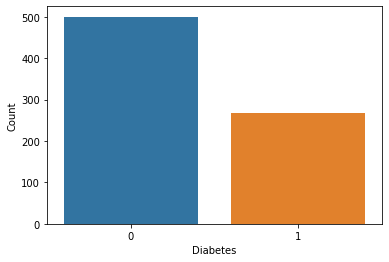

In [14]:
#plotting Outcomes based on the number of dataset entries
sns.countplot(x='Outcome', data=df)
plt.xlabel('Diabetes')
plt.ylabel('Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1edb9518>,
      dtype=object)

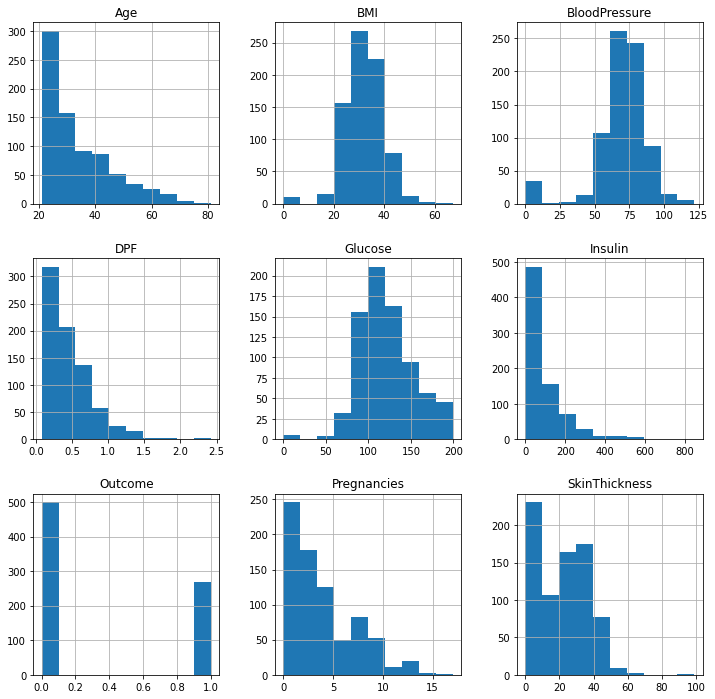

In [15]:
df.hist(figsize=(12,12))

**DATA CLEANING**

In [16]:
df_copy = df.copy(deep=True)
df_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df_copy[['Pregnancies', 'Glucose', 'BloodPressure',
                    'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [17]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
#fill NaN value with mean, median of the corresponding columns
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['Pregnancies'].fillna(df_copy['Pregnancies'].median(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)

In [19]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


In [20]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b1e987940>,
      dtype=object)

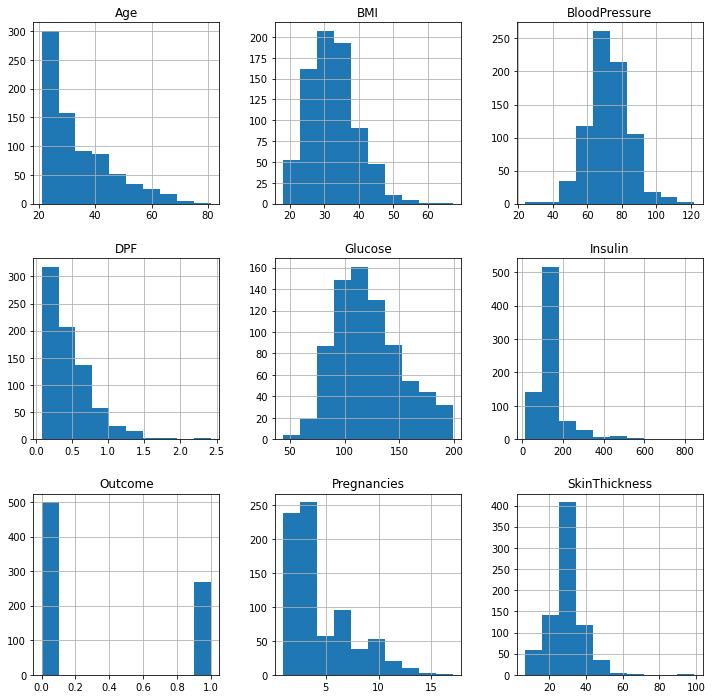

In [21]:
df_copy.hist(figsize=(12,12))

**MODEL SELECTION**

In [96]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X shape:  (768, 8)
y shape:  (768,)
X_train shape:  (614, 8)
y_train shape:  (614,)
X_test shape:  (154, 8)
y_test shape:  (154,)


**Standarized the dataset**

In [97]:
#features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

**MODEL BUILDING**

In [98]:
#model building modules
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#for metrices, accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [100]:
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        },

         'Kneigbors_classifier':{
          'model':KNeighborsClassifier(),
          'parameters':{
              'n_neighbors':[5,10,15,20]
          }
      }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.769106
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 10}",0.728455
2,random_forest,{'n_estimators': 100},0.747967
3,svm,"{'C': 1, 'kernel': 'linear'}",0.773984
4,Kneigbors_classifier,{'n_neighbors': 15},0.743089


# from the above dataframe, it clear that our model gives its best score/performance for Logistic Regression,we further tune with LogisticRegression

In [106]:
#Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(C=1,random_state=0),X_train, y_train, cv=5)
print('Average accuracy: {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average accuracy: 76.0%


In [107]:
clf = LogisticRegression(C=1,random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**MODEL EVALUATION**

In [108]:
y_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix: \n', confusion)

Confusion Matrix: 
 [[98  9]
 [18 29]]


Text(33.0, 0.5, 'Accurate value')

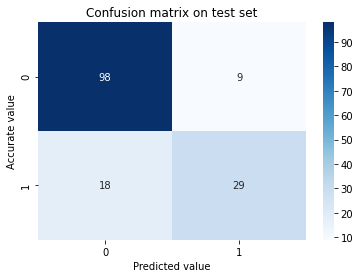

In [109]:
#plotting a confusion matrix
sns.heatmap(confusion, annot=True, cmap='Blues')
plt.title("Confusion matrix on test set")
plt.xlabel('Predicted value')
plt.ylabel('Accurate value')

In [112]:
#Evaluate accuracy score and classification report
from sklearn.metrics import accuracy_score
acc_score = round(accuracy_score(y_test, y_predicted)*100, 2)
print("Accuracy score : \n",acc_score)

Accuracy score : 
 82.47


In [113]:
classificationreport = classification_report(y_test, y_predicted)
print('Classification report on y_test & y_predicted: \n', classificationreport)

Classification report on y_test & y_predicted: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



**Evaluation on training set**

In [114]:
#creating a confusion matrix on training set
y_train_predicted = clf.predict(X_train)
confusion = confusion_matrix(y_train, y_train_predicted)
print('Confusion matrix on training set:\n', confusion)

Confusion matrix on training set:
 [[341  52]
 [ 94 127]]


Text(33.0, 0.5, 'Accurate value')

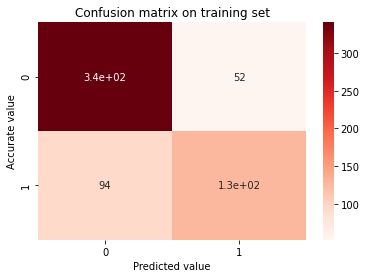

In [115]:
#plotting a confusion matrix
sns.heatmap(confusion, annot=True, cmap='Reds')
plt.title("Confusion matrix on training set")
plt.xlabel('Predicted value')
plt.ylabel('Accurate value')

In [116]:
#Evaluating accuracy score and classification report
acc_score = round(accuracy_score(y_train, y_train_predicted)*100, 2)
print('Accuracy score: \n', acc_score)

Accuracy score: 
 76.22


In [117]:
classificationreport = classification_report(y_train, y_train_predicted)
print("Classification report \n", classificationreport)

Classification report 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       393
           1       0.71      0.57      0.64       221

    accuracy                           0.76       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.76      0.76       614



**Predictions**

In [118]:
#creating a function for prediction
# Pregnancies      0
# Glucose          0
# BloodPressure    0
# SkinThickness    0
# Insulin          0
# BMI              0
# DPF              0
# Age              0
# Outcome 
def make_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
  preg = int(Pregnancies)
  glucose = float(Glucose)
  BP = float(BloodPressure)
  STn = float(SkinThickness)
  insulin = float(Insulin)
  bmi = float(BMI)
  dpf = float(DPF)
  age = int(Age)

  x = [[preg, glucose, BP, STn, insulin, bmi, dpf, age]]
  X_transformed = scaler.transform(x)
  
  return clf.predict(X_transformed)

In [119]:
#prediction 1
#input sequences: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = make_prediction(5, 120, 92, 10, 81, 26.1, 0.551, 67)[0]
if prediction:
  print("Oops, You have a diabetes")
else:
  print("Great ! You don't have a diabetes")

Great ! You don't have a diabetes


In [120]:
#prediction 2
#input sequences: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = make_prediction(1, 80, 56, 29, 125, 26.1, 0.351, 29)[0]
if prediction:
  print("Oops, You have a diabetes")
else:
  print("Great ! You don't have a diabetes")

Great ! You don't have a diabetes


In [127]:
#prediction 3
#input sequences: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = make_prediction(1, 147, 88, 23, 45, 34.5, 0.603, 40)[0]
if prediction:
  print("Oops, You have a diabetes")
else:
  print("Great ! You don't have a diabetes")

Oops, You have a diabetes
